In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

## Selecting companies 
I choose five technologies companies that I am familiar with from the rank of market cap. They are Apple (AAPL), Microsoft (MSFT), Google (GOOG), Amazon (AMZN), and Facebook (FB).

In [2]:
symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "FB"]

## Testing the Method
### 1. Download Data
Before applying learning and testing to all of them, I use one of them (Google) to try and test my ml approach.

I download its historical data from the past 5 years with an interval of 1 day.

In [3]:
data_1d = yf.download("GOOG", start="2016-01-01", end="2021-11-19")

[*********************100%***********************]  1 of 1 completed


In [4]:
data_1d

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900
...,...,...,...,...,...,...
2021-11-12,2956.629883,2997.189941,2929.080078,2992.909912,2992.909912,852000
2021-11-15,3000.000000,3009.540039,2973.050049,2987.760010,2987.760010,812400
2021-11-16,2983.409912,2996.649902,2967.000000,2981.520020,2981.520020,862700


### 2. Prepocessing Data
I decide to use **Linear Regression** as my ML model and use the ***mean* adjusted close price of the past 5 days** and the ***mean* adjusted close price of the past 10 days** as *x* (the input), and the **adjusted close price** as *y* (the value we want to predict). Hopefully, we can get a model that predicts the next close price based on the data from the past few days.

In [ ]:
tmp = data_1d[["Adj Close"]]
# shift(1) becasue we don't want to include the current price when calculating the mean
tmp["mean_5"] = tmp["Adj Close"].shift(1).rolling(window=5).mean()
tmp["mean_10"] = tmp["Adj Close"].shift(1).rolling(window=10).mean()

tmp = tmp.dropna()

x = tmp[["mean_5", "mean_10"]]
y = tmp[["Adj Close"]]

In [6]:
x

,mean_5,mean_10
Date,,
2016-01-19,710.366003,722.073004
2016-01-20,707.517993,718.067999
2016-01-21,701.993994,713.654999
2016-01-22,703.200000,709.952002
2016-01-25,705.306006,709.838000
...,...,...
2021-11-12,2964.860010,2949.190991
2021-11-15,2966.477979,2951.940991
2021-11-16,2966.623975,2963.168994


In [7]:
from sklearn.model_selection import train_test_split

# Split x and y into traing and tesing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 3. Applying ML Model and Testing Predictions
Use the Linear Regression model to learn the data and test its performance.

Both the score and the plot seem to show promising results.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9973588199879866

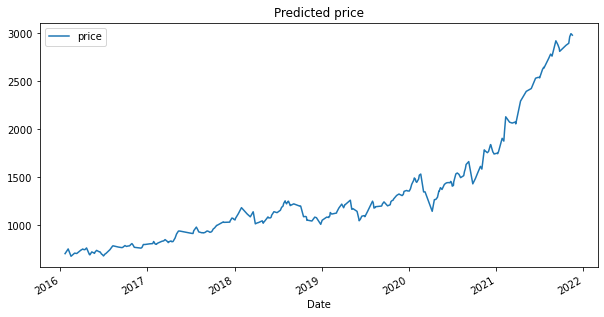

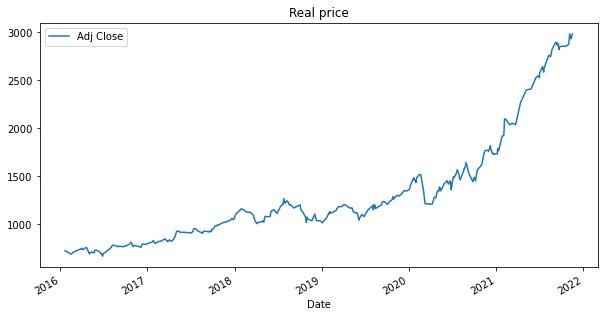

In [9]:
predicted = model.predict(x_test)
predicted = pd.DataFrame(predicted, index=y_test.index, columns = ['price']) 
predicted.plot(figsize=(10,5), title="Predicted price")
y_test.plot(figsize=(10,5), title="Real price")

Try to make a prediction for Google's adjusted close price on the next day (2021-11-19).

In [10]:
tmp = data_1d[["Adj Close"]][-10:]  # Only the last 10 rows are needed
tmp.loc[tmp.shape[0]] = [0]     # Add a row for the next day
tmp["mean_5"] = tmp["Adj Close"].shift(1).rolling(window=5).mean()
tmp["mean_10"] = tmp["Adj Close"].shift(1).rolling(window=10).mean()

tmp = tmp.dropna()
tmp = tmp[["mean_5", "mean_10"]]
tmp

,mean_5,mean_10
Date,,
10,2991.521973,2978.190991


In [11]:
float(model.predict(tmp))

3008.8365287963397

## Applying Method
Apply the above method to all companies I select and predict the next close prices:

In [ ]:
predicted_list = []
latest_close_list = []

for symbol in symbols:
    # Download data
    data_1d = yf.download(symbol, start="2016-01-01", end="2021-11-19")

    # Preprocess data
    tmp = data_1d[["Adj Close"]]
    tmp["mean_5"] = tmp["Adj Close"].shift(1).rolling(window=5).mean()
    tmp["mean_10"] = tmp["Adj Close"].shift(1).rolling(window=10).mean()
    tmp = tmp.dropna()
    x = tmp[["mean_5", "mean_10"]]
    y = tmp[["Adj Close"]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Apply model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Use model to predict 
    tmp = data_1d[["Adj Close"]][-10:]
    tmp.loc[tmp.shape[0]] = [0]
    tmp["mean_5"] = tmp["Adj Close"].shift(1).rolling(window=5).mean()
    tmp["mean_10"] = tmp["Adj Close"].shift(1).rolling(window=10).mean()
    tmp = tmp.dropna()
    tmp = tmp[["mean_5", "mean_10"]]

    predicted = float(model.predict(tmp))
    predicted_list.append(predicted)
    latest_close = float(data_1d["Adj Close"][-1:])
    latest_close_list.append(latest_close)

In [13]:
predicted_change_list = []
percent_change_list = []
print("Predicted adjusted close price:")
for i, symbol in enumerate(symbols):
    predicted_change_list.append( predicted_list[i] - latest_close_list[i] )
    percent_change_list.append(predicted_change_list[i] / latest_close_list[i])
    print(
        f"{symbol}: {predicted_list[i]} - Predicted change: {round(predicted_change_list[i], 3)} ({round(percent_change_list[i], 4)}%)"
        )
    

Predicted adjusted close price:
AAPL: 153.38443737903611 - Predicted change: -4.486 (-0.0284%)
MSFT: 340.1002175239367 - Predicted change: -1.17 (-0.0034%)
GOOG: 3008.8365287963397 - Predicted change: -5.343 (-0.0018%)
AMZN: 3587.3291394348234 - Predicted change: -108.731 (-0.0294%)
FB: 343.8463922857373 - Predicted change: 5.156 (0.0152%)


## Decision
For the first week, I'm planning to only allocate about 20% of my funds (which is $50,000). And base on the above prediction, I want to allocate more on Facebook and less on Amazon than the others. 

However, the real-time price changed a lot from the last close price when I purchased them. I may also need to use data with shorter time intervals next time or connect to Investopedia's API to do something automatically.

Final result:
| Symbol | QTY | Purchase Price | Total Value | Current Price |
|---|---|---|---|---|
| AAPL | 4 | $160.70 | $642.20 | $160.55 |
| MSFT | 2 | $343.15 | $686.22 | $343.11 |
| GOOG | 10 | $3,003.58 | $29,990.50 | $2,999.05 |
| AMZN | 1 | $3,705.51 | $3,676.57 | $3,676.57 |
| FB | 87 | $346.86 | $30,041.10 | $345.30 |

